In [115]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape

from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
import glob
from datetime import datetime
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder

#import pyemd
%matplotlib inline


In [116]:
import glob

all_data = pd.DataFrame()
#path = 'C:\\Users\\kuruparans\\Documents\\ATM_CashFlow\\ATM_cashflow_prediction\\atm_data_m2.csv'
df=pd.read_csv('C:\\Users\\kuruparans\\Documents\\ATM_CashFlow\\ATM_cashflow_prediction\\atm_data_m2.csv')
#for f in glob.glob(path):
#    df = pd.read_excel(f, sheet_name=None, ignore_index=True, usecols=['windspd','month','day','hour'])
#    cdf = pd.concat(df.values())
#    all_data = all_data.append(cdf,ignore_index=True)
#print(all_data)
dataframe=df

In [117]:

LE = LabelEncoder()
dataframe['working_day'] = LE.fit_transform(dataframe['working_day'])
dataframe['holiday_sequence'] = LE.fit_transform(dataframe['holiday_sequence'])
dataframe['festival_religion'] = LE.fit_transform(dataframe['festival_religion'])


In [118]:
dataframe['date_time']= dataframe['year']+(dataframe['month'])*12+(dataframe['day'])
dataframe=dataframe[['date_time','total_amount_withdrawn','working_day','holiday_sequence','festival_religion'] ]
dataframe=dataframe.dropna()

In [119]:
dataframe.head()

,date_time,total_amount_withdrawn,working_day,holiday_sequence,festival_religion
0,2024,897100,1,7,4
1,2024,826000,1,7,4
2,2024,754400,1,7,4
3,2025,834200,1,7,4
4,2025,575300,1,7,4


In [120]:
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1683 561


In [121]:
train.shape

(1683, 5)

In [122]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back),1:]
        dataX.append(a)
        dataY.append(dataset[i + look_back,1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [123]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1659
537


In [124]:
#trainY

In [125]:
trainX.shape

(1659, 24, 4)

In [126]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]*testX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]*testX.shape[2]))

In [127]:
trainX.shape



(1659, 1, 96)

In [128]:
trainY.shape


(1659,)

In [141]:
lookback=96

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(120, input_shape=(1, 96), kernel_initializer="glorot_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
  
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="glorot_uniform")`
  app.launch_new_i

Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 5s 3ms/step - loss: 215589.4929 - val_loss: 163750.2458
Epoch 2/300
1659/1659 [==============================] - 0s 79us/step - loss: 173029.0805 - val_loss: 150108.8469
Epoch 3/300
1659/1659 [==============================] - 0s 74us/step - loss: 163046.1570 - val_loss: 146381.8389
Epoch 4/300
1659/1659 [==============================] - 0s 79us/step - loss: 156070.9229 - val_loss: 144774.6522
Epoch 5/300
1659/1659 [==============================] - 0s 70us/step - loss: 153362.0275 - val_loss: 148598.0738
Epoch 6/300
1659/1659 [==============================] - 0s 75us/step - loss: 154319.4543 - val_loss: 149710.3364
Epoch 7/300
1659/1659 [==============================] - 0s 65us/step - loss: 152213.2337 - val_loss: 141664.6278
Epoch 8/300
1659/1659 [==============================] - 0s 60us/step - loss: 149044.1033 - val_loss: 141862.2605
Epoch 9/300
1659/1659 [===================

1659/1659 [==============================] - 0s 42us/step - loss: 148213.1248 - val_loss: 139660.5858
Epoch 72/300
1659/1659 [==============================] - 0s 47us/step - loss: 147635.9611 - val_loss: 138551.3566
Epoch 73/300
1659/1659 [==============================] - 0s 42us/step - loss: 147332.3144 - val_loss: 139909.8042
Epoch 74/300
1659/1659 [==============================] - 0s 42us/step - loss: 147595.7507 - val_loss: 139937.8366
Epoch 75/300
1659/1659 [==============================] - 0s 42us/step - loss: 147997.0049 - val_loss: 140392.1270
Epoch 76/300
1659/1659 [==============================] - 0s 47us/step - loss: 147705.9248 - val_loss: 138540.6231
Epoch 77/300
1659/1659 [==============================] - 0s 42us/step - loss: 147473.8400 - val_loss: 140142.5509
Epoch 78/300
1659/1659 [==============================] - 0s 60us/step - loss: 147603.2884 - val_loss: 139892.8343
Epoch 79/300
1659/1659 [==============================] - 0s 60us/step - loss: 147509.5282 - 

Epoch 142/300
1659/1659 [==============================] - 0s 51us/step - loss: 147882.1692 - val_loss: 139370.6164
Epoch 143/300
1659/1659 [==============================] - 0s 60us/step - loss: 147461.8708 - val_loss: 138463.6915
Epoch 144/300
1659/1659 [==============================] - 0s 51us/step - loss: 147166.9809 - val_loss: 139397.9792
Epoch 145/300
1659/1659 [==============================] - 0s 58us/step - loss: 147257.4843 - val_loss: 140454.3571
Epoch 146/300
1659/1659 [==============================] - 0s 63us/step - loss: 147515.7316 - val_loss: 139171.9361
Epoch 147/300
1659/1659 [==============================] - 0s 51us/step - loss: 147221.1699 - val_loss: 139161.9849
Epoch 148/300
1659/1659 [==============================] - 0s 47us/step - loss: 147209.4607 - val_loss: 138863.2780
Epoch 149/300
1659/1659 [==============================] - 0s 38us/step - loss: 147224.1361 - val_loss: 139914.0795
Epoch 150/300
1659/1659 [==============================] - 0s 60us/step 

1659/1659 [==============================] - 0s 51us/step - loss: 147271.9351 - val_loss: 141028.0109
Epoch 213/300
1659/1659 [==============================] - 0s 42us/step - loss: 147433.9867 - val_loss: 140578.8432
Epoch 214/300
1659/1659 [==============================] - 0s 47us/step - loss: 147334.6633 - val_loss: 140917.3025
Epoch 215/300
1659/1659 [==============================] - 0s 42us/step - loss: 147247.4529 - val_loss: 143167.2810
Epoch 216/300
1659/1659 [==============================] - 0s 51us/step - loss: 147750.7393 - val_loss: 141488.9794
Epoch 217/300
1659/1659 [==============================] - 0s 51us/step - loss: 147327.9604 - val_loss: 141753.8033
Epoch 218/300
1659/1659 [==============================] - 0s 51us/step - loss: 147501.1148 - val_loss: 141606.5646
Epoch 219/300
1659/1659 [==============================] - 0s 47us/step - loss: 147426.8150 - val_loss: 140783.1639
Epoch 220/300
1659/1659 [==============================] - 0s 51us/step - loss: 147236

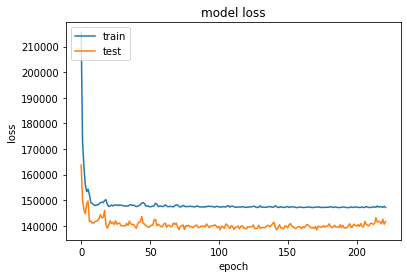

In [142]:
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 192524.762
Root mean squared error Test: 185831.060


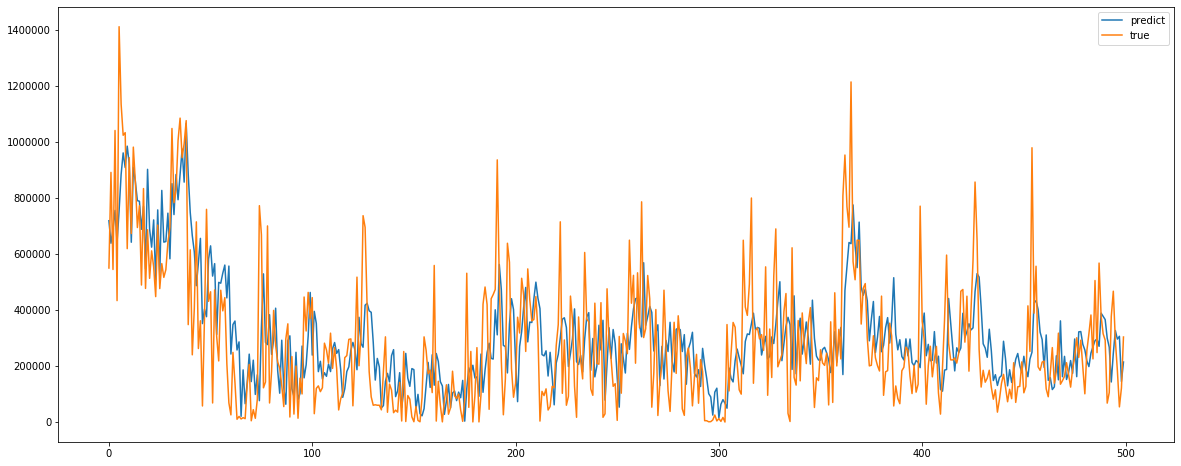

Variance : 0.387
Mean absolute error Train: 149309.735
Mean absolute error Test: 141717.144


In [143]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [144]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [145]:
#changing loss funtion to RMSE 

Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 5s 3ms/step - loss: 623150.1659 - acc: 0.0000e+00 - val_loss: 346706.4701 - val_acc: 0.0000e+00
Epoch 2/300
1659/1659 [==============================] - 0s 60us/step - loss: 623150.0211 - acc: 0.0000e+00 - val_loss: 346706.3894 - val_acc: 0.0000e+00
Epoch 3/300
1659/1659 [==============================] - 0s 60us/step - loss: 623149.9008 - acc: 0.0000e+00 - val_loss: 346706.2935 - val_acc: 0.0000e+00
Epoch 4/300
1659/1659 [==============================] - 0s 60us/step - loss: 623149.7922 - acc: 0.0000e+00 - val_loss: 346706.2034 - val_acc: 0.0000e+00
Epoch 5/300
1659/1659 [==============================] - 0s 60us/step - loss: 623149.6719 - acc: 0.0000e+00 - val_loss: 346706.1257 - val_acc: 0.0000e+00
Epoch 6/300
1659/1659 [==============================] - 0s 70us/step - loss: 623149.5431 - acc: 0.0000e+00 - val_loss: 346706.0254 - val_acc: 0.0000e+00
Epoch 7/300
1659/1659 [=======

1659/1659 [==============================] - 0s 83us/step - loss: 623143.6395 - acc: 0.0000e+00 - val_loss: 346701.7852 - val_acc: 0.0000e+00
Epoch 54/300
1659/1659 [==============================] - 0s 60us/step - loss: 623143.5164 - acc: 0.0000e+00 - val_loss: 346701.7082 - val_acc: 0.0000e+00
Epoch 55/300
1659/1659 [==============================] - 0s 70us/step - loss: 623143.3731 - acc: 0.0000e+00 - val_loss: 346701.6050 - val_acc: 0.0000e+00
Epoch 56/300
1659/1659 [==============================] - 0s 70us/step - loss: 623143.2462 - acc: 0.0000e+00 - val_loss: 346701.5200 - val_acc: 0.0000e+00
Epoch 57/300
1659/1659 [==============================] - 0s 60us/step - loss: 623143.1206 - acc: 0.0000e+00 - val_loss: 346701.4270 - val_acc: 0.0000e+00
Epoch 58/300
1659/1659 [==============================] - 0s 70us/step - loss: 623143.0116 - acc: 0.0000e+00 - val_loss: 346701.3500 - val_acc: 0.0000e+00
Epoch 59/300
1659/1659 [==============================] - 0s 70us/step - loss: 6231

Epoch 106/300
1659/1659 [==============================] - 0s 60us/step - loss: 623136.9642 - acc: 0.0000e+00 - val_loss: 346697.0408 - val_acc: 0.0000e+00
Epoch 107/300
1659/1659 [==============================] - 0s 70us/step - loss: 623136.8348 - acc: 0.0000e+00 - val_loss: 346696.9333 - val_acc: 0.0000e+00
Epoch 108/300
1659/1659 [==============================] - 0s 70us/step - loss: 623136.7151 - acc: 0.0000e+00 - val_loss: 346696.8526 - val_acc: 0.0000e+00
Epoch 109/300
1659/1659 [==============================] - 0s 60us/step - loss: 623136.5886 - acc: 0.0000e+00 - val_loss: 346696.7712 - val_acc: 0.0000e+00
Epoch 110/300
1659/1659 [==============================] - 0s 60us/step - loss: 623136.4636 - acc: 0.0000e+00 - val_loss: 346696.6753 - val_acc: 0.0000e+00
Epoch 111/300
1659/1659 [==============================] - 0s 70us/step - loss: 623136.3348 - acc: 0.0000e+00 - val_loss: 346696.5882 - val_acc: 0.0000e+00
Epoch 112/300
1659/1659 [==============================] - 0s 70

1659/1659 [==============================] - 0s 60us/step - loss: 623130.4384 - acc: 0.0000e+00 - val_loss: 346692.3436 - val_acc: 0.0000e+00
Epoch 159/300
1659/1659 [==============================] - 0s 70us/step - loss: 623130.3052 - acc: 0.0000e+00 - val_loss: 346692.2702 - val_acc: 0.0000e+00
Epoch 160/300
1659/1659 [==============================] - 0s 57us/step - loss: 623130.1765 - acc: 0.0000e+00 - val_loss: 346692.1714 - val_acc: 0.0000e+00
Epoch 161/300
1659/1659 [==============================] - 0s 56us/step - loss: 623130.0681 - acc: 0.0000e+00 - val_loss: 346692.0769 - val_acc: 0.0000e+00
Epoch 162/300
1659/1659 [==============================] - 0s 70us/step - loss: 623129.9353 - acc: 0.0000e+00 - val_loss: 346691.9905 - val_acc: 0.0000e+00
Epoch 163/300
1659/1659 [==============================] - 0s 60us/step - loss: 623129.8099 - acc: 0.0000e+00 - val_loss: 346691.8931 - val_acc: 0.0000e+00
Epoch 164/300
1659/1659 [==============================] - 0s 70us/step - loss

1659/1659 [==============================] - 0s 79us/step - loss: 623123.8890 - acc: 0.0000e+00 - val_loss: 346687.6776 - val_acc: 0.0000e+00
Epoch 211/300
1659/1659 [==============================] - 0s 60us/step - loss: 623123.7672 - acc: 0.0000e+00 - val_loss: 346687.5904 - val_acc: 0.0000e+00
Epoch 212/300
1659/1659 [==============================] - 0s 60us/step - loss: 623123.6488 - acc: 0.0000e+00 - val_loss: 346687.4996 - val_acc: 0.0000e+00
Epoch 213/300
1659/1659 [==============================] - 0s 70us/step - loss: 623123.5059 - acc: 0.0000e+00 - val_loss: 346687.4008 - val_acc: 0.0000e+00
Epoch 214/300
1659/1659 [==============================] - 0s 70us/step - loss: 623123.3953 - acc: 0.0000e+00 - val_loss: 346687.3122 - val_acc: 0.0000e+00
Epoch 215/300
1659/1659 [==============================] - 0s 70us/step - loss: 623123.2769 - acc: 0.0000e+00 - val_loss: 346687.2221 - val_acc: 0.0000e+00
Epoch 216/300
1659/1659 [==============================] - 0s 64us/step - loss

1659/1659 [==============================] - 0s 60us/step - loss: 623117.3607 - acc: 0.0000e+00 - val_loss: 346683.0000 - val_acc: 0.0000e+00
Epoch 263/300
1659/1659 [==============================] - 0s 60us/step - loss: 623117.2348 - acc: 0.0000e+00 - val_loss: 346682.9099 - val_acc: 0.0000e+00
Epoch 264/300
1659/1659 [==============================] - 0s 60us/step - loss: 623117.1051 - acc: 0.0000e+00 - val_loss: 346682.8220 - val_acc: 0.0000e+00
Epoch 265/300
1659/1659 [==============================] - 0s 60us/step - loss: 623116.9804 - acc: 0.0000e+00 - val_loss: 346682.7225 - val_acc: 0.0000e+00
Epoch 266/300
1659/1659 [==============================] - 0s 60us/step - loss: 623116.8601 - acc: 0.0000e+00 - val_loss: 346682.6418 - val_acc: 0.0000e+00
Epoch 267/300
1659/1659 [==============================] - 0s 60us/step - loss: 623116.7379 - acc: 0.0000e+00 - val_loss: 346682.5357 - val_acc: 0.0000e+00
Epoch 268/300
1659/1659 [==============================] - 0s 70us/step - loss

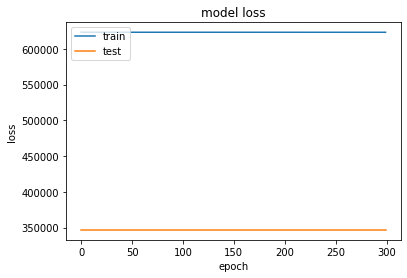

Root mean squared error Train: 626484.701
Root mean squared error Test: 371791.413


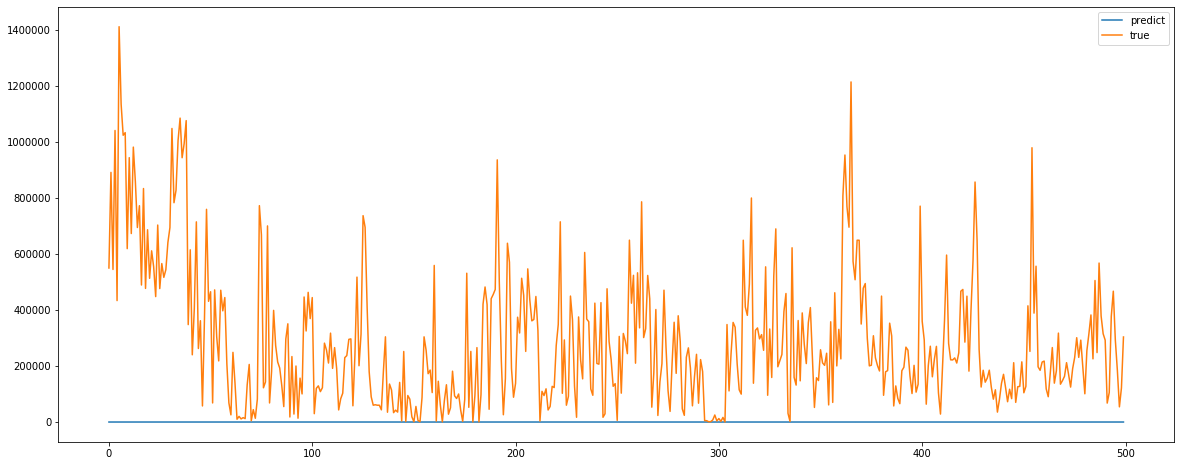

Variance : -1.454
Mean absolute error Train: 588428.352
Mean absolute error Test: 286164.610


In [146]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [147]:
#GRU Unit

Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 8s 5ms/step - loss: 588468.3406 - val_loss: 286197.4127
Epoch 2/300
1659/1659 [==============================] - 0s 79us/step - loss: 588467.9637 - val_loss: 286197.1109
Epoch 3/300
1659/1659 [==============================] - 0s 83us/step - loss: 588467.5667 - val_loss: 286196.7911
Epoch 4/300
1659/1659 [==============================] - 0s 79us/step - loss: 588467.1779 - val_loss: 286196.4831
Epoch 5/300
1659/1659 [==============================] - 0s 79us/step - loss: 588466.7982 - val_loss: 286196.1680
Epoch 6/300
1659/1659 [==============================] - 0s 83us/step - loss: 588466.4097 - val_loss: 286195.8541
Epoch 7/300
1659/1659 [==============================] - 0s 89us/step - loss: 588466.0202 - val_loss: 286195.5519
Epoch 8/300
1659/1659 [==============================] - 0s 93us/step - loss: 588465.6333 - val_loss: 286195.2322
Epoch 9/300
1659/1659 [===================

Epoch 72/300
1659/1659 [==============================] - 0s 111us/step - loss: 588440.8993 - val_loss: 286175.1953
Epoch 73/300
1659/1659 [==============================] - 0s 102us/step - loss: 588440.5186 - val_loss: 286174.8789
Epoch 74/300
1659/1659 [==============================] - 0s 89us/step - loss: 588440.1258 - val_loss: 286174.5730
Epoch 75/300
1659/1659 [==============================] - 0s 102us/step - loss: 588439.7451 - val_loss: 286174.2598
Epoch 76/300
1659/1659 [==============================] - 0s 111us/step - loss: 588439.3626 - val_loss: 286173.9375
Epoch 77/300
1659/1659 [==============================] - 0s 108us/step - loss: 588438.9671 - val_loss: 286173.6207
Epoch 78/300
1659/1659 [==============================] - 0s 108us/step - loss: 588438.5676 - val_loss: 286173.3104
Epoch 79/300
1659/1659 [==============================] - 0s 83us/step - loss: 588438.1996 - val_loss: 286173.0063
Epoch 80/300
1659/1659 [==============================] - 0s 79us/step - l

Epoch 143/300
1659/1659 [==============================] - 0s 93us/step - loss: 588413.4699 - val_loss: 286152.9601
Epoch 144/300
1659/1659 [==============================] - 0s 98us/step - loss: 588413.0808 - val_loss: 286152.6447
Epoch 145/300
1659/1659 [==============================] - 0s 102us/step - loss: 588412.7002 - val_loss: 286152.3330
Epoch 146/300
1659/1659 [==============================] - 0s 93us/step - loss: 588412.3088 - val_loss: 286152.0176
Epoch 147/300
1659/1659 [==============================] - 0s 111us/step - loss: 588411.9219 - val_loss: 286151.7034
Epoch 148/300
1659/1659 [==============================] - 0s 130us/step - loss: 588411.5428 - val_loss: 286151.4026
Epoch 149/300
1659/1659 [==============================] - 0s 104us/step - loss: 588411.1433 - val_loss: 286151.0814
Epoch 150/300
1659/1659 [==============================] - 0s 93us/step - loss: 588410.7555 - val_loss: 286150.7708
Epoch 151/300
1659/1659 [==============================] - 0s 98us/s

1659/1659 [==============================] - 0s 51us/step - loss: 588386.4115 - val_loss: 286131.0387
Epoch 214/300
1659/1659 [==============================] - 0s 60us/step - loss: 588386.0296 - val_loss: 286130.7267
Epoch 215/300
1659/1659 [==============================] - 0s 51us/step - loss: 588385.6430 - val_loss: 286130.4157
Epoch 216/300
1659/1659 [==============================] - 0s 60us/step - loss: 588385.2504 - val_loss: 286130.1083
Epoch 217/300
1659/1659 [==============================] - 0s 60us/step - loss: 588384.8679 - val_loss: 286129.7828
Epoch 218/300
1659/1659 [==============================] - 0s 60us/step - loss: 588384.4869 - val_loss: 286129.4707
Epoch 219/300
1659/1659 [==============================] - 0s 60us/step - loss: 588384.0874 - val_loss: 286129.1546
Epoch 220/300
1659/1659 [==============================] - 0s 60us/step - loss: 588383.7030 - val_loss: 286128.8476
Epoch 221/300
1659/1659 [==============================] - 0s 60us/step - loss: 588383

Epoch 284/300
1659/1659 [==============================] - 0s 70us/step - loss: 588358.9709 - val_loss: 286108.8053
Epoch 285/300
1659/1659 [==============================] - 0s 70us/step - loss: 588358.5889 - val_loss: 286108.4910
Epoch 286/300
1659/1659 [==============================] - 0s 60us/step - loss: 588358.2096 - val_loss: 286108.1699
Epoch 287/300
1659/1659 [==============================] - 0s 51us/step - loss: 588357.8135 - val_loss: 286107.8687
Epoch 288/300
1659/1659 [==============================] - 0s 60us/step - loss: 588357.4234 - val_loss: 286107.5606
Epoch 289/300
1659/1659 [==============================] - 0s 60us/step - loss: 588357.0409 - val_loss: 286107.2430
Epoch 290/300
1659/1659 [==============================] - 0s 70us/step - loss: 588356.6571 - val_loss: 286106.9277
Epoch 291/300
1659/1659 [==============================] - 0s 64us/step - loss: 588356.2711 - val_loss: 286106.6156
Epoch 292/300
1659/1659 [==============================] - 0s 70us/step 

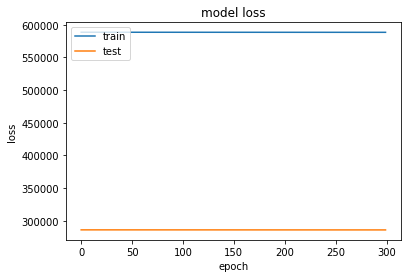

In [148]:
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 626414.424
Root mean squared error Test: 371742.739


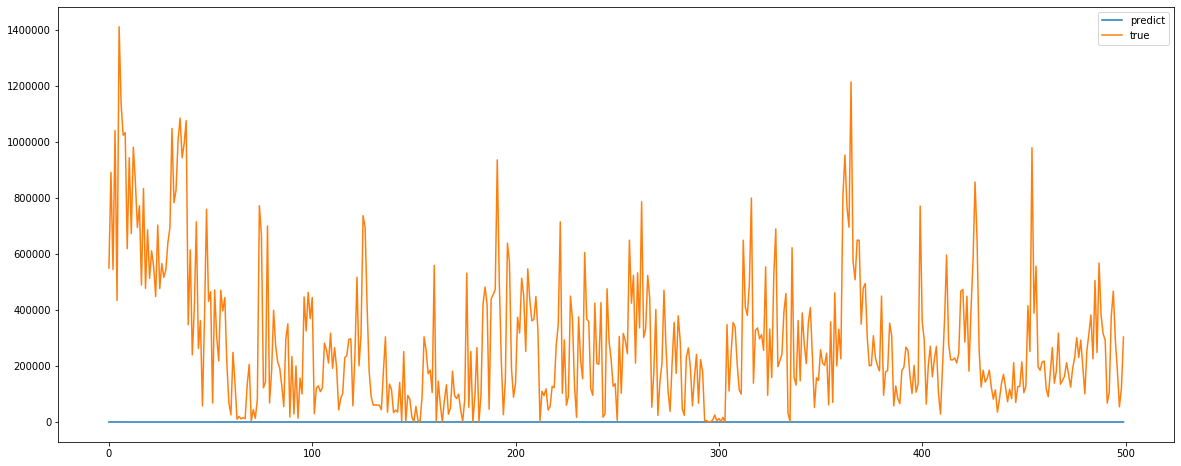

Variance : -1.453
Mean absolute error Train: 588352.589
Mean absolute error Test: 286103.797


In [149]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))


Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 4s 2ms/step - loss: 623149.7197 - acc: 0.0000e+00 - val_loss: 346706.3567 - val_acc: 0.0000e+00
Epoch 2/300
1659/1659 [==============================] - 0s 44us/step - loss: 623149.3856 - acc: 0.0000e+00 - val_loss: 346706.1743 - val_acc: 0.0000e+00
Epoch 3/300
1659/1659 [==============================] - 0s 51us/step - loss: 623149.1192 - acc: 0.0000e+00 - val_loss: 346706.0109 - val_acc: 0.0000e+00
Epoch 4/300
1659/1659 [==============================] - 0s 51us/step - loss: 623148.8519 - acc: 0.0000e+00 - val_loss: 346705.8329 - val_acc: 0.0000e+00
Epoch 5/300
1659/1659 [==============================] - 0s 51us/step - loss: 623148.5828 - acc: 0.0000e+00 - val_loss: 346705.6490 - val_acc: 0.0000e+00
Epoch 6/300
1659/1659 [==============================] - 0s 51us/step - loss: 623148.3205 - acc: 0.0000e+00 - val_loss: 346705.4870 - val_acc: 0.0000e+00
Epoch 7/300
1659/1659 [=======

1659/1659 [==============================] - 0s 60us/step - loss: 623135.7583 - acc: 0.0000e+00 - val_loss: 346697.3188 - val_acc: 0.0000e+00
Epoch 54/300
1659/1659 [==============================] - 0s 57us/step - loss: 623135.4844 - acc: 0.0000e+00 - val_loss: 346697.1328 - val_acc: 0.0000e+00
Epoch 55/300
1659/1659 [==============================] - 0s 45us/step - loss: 623135.2165 - acc: 0.0000e+00 - val_loss: 346696.9606 - val_acc: 0.0000e+00
Epoch 56/300
1659/1659 [==============================] - 0s 51us/step - loss: 623134.9445 - acc: 0.0000e+00 - val_loss: 346696.8051 - val_acc: 0.0000e+00
Epoch 57/300
1659/1659 [==============================] - 0s 60us/step - loss: 623134.6810 - acc: 0.0000e+00 - val_loss: 346696.6206 - val_acc: 0.0000e+00
Epoch 58/300
1659/1659 [==============================] - 0s 51us/step - loss: 623134.4071 - acc: 0.0000e+00 - val_loss: 346696.4418 - val_acc: 0.0000e+00
Epoch 59/300
1659/1659 [==============================] - 0s 60us/step - loss: 6231

Epoch 106/300
1659/1659 [==============================] - 0s 51us/step - loss: 623121.5735 - acc: 0.0000e+00 - val_loss: 346688.0898 - val_acc: 0.0000e+00
Epoch 107/300
1659/1659 [==============================] - 0s 70us/step - loss: 623121.3128 - acc: 0.0000e+00 - val_loss: 346687.9227 - val_acc: 0.0000e+00
Epoch 108/300
1659/1659 [==============================] - 0s 70us/step - loss: 623121.0518 - acc: 0.0000e+00 - val_loss: 346687.7527 - val_acc: 0.0000e+00
Epoch 109/300
1659/1659 [==============================] - 0s 64us/step - loss: 623120.7839 - acc: 0.0000e+00 - val_loss: 346687.5710 - val_acc: 0.0000e+00
Epoch 110/300
1659/1659 [==============================] - 0s 60us/step - loss: 623120.5194 - acc: 0.0000e+00 - val_loss: 346687.4017 - val_acc: 0.0000e+00
Epoch 111/300
1659/1659 [==============================] - 0s 57us/step - loss: 623120.2474 - acc: 0.0000e+00 - val_loss: 346687.2091 - val_acc: 0.0000e+00
Epoch 112/300
1659/1659 [==============================] - 0s 51

1659/1659 [==============================] - 0s 51us/step - loss: 623107.6808 - acc: 0.0000e+00 - val_loss: 346679.0606 - val_acc: 0.0000e+00
Epoch 159/300
1659/1659 [==============================] - 0s 51us/step - loss: 623107.4230 - acc: 0.0000e+00 - val_loss: 346678.8811 - val_acc: 0.0000e+00
Epoch 160/300
1659/1659 [==============================] - 0s 47us/step - loss: 623107.1472 - acc: 0.0000e+00 - val_loss: 346678.6980 - val_acc: 0.0000e+00
Epoch 161/300
1659/1659 [==============================] - 0s 47us/step - loss: 623106.8821 - acc: 0.0000e+00 - val_loss: 346678.5301 - val_acc: 0.0000e+00
Epoch 162/300
1659/1659 [==============================] - 0s 51us/step - loss: 623106.6073 - acc: 0.0000e+00 - val_loss: 346678.3573 - val_acc: 0.0000e+00
Epoch 163/300
1659/1659 [==============================] - 0s 60us/step - loss: 623106.3381 - acc: 0.0000e+00 - val_loss: 346678.1749 - val_acc: 0.0000e+00
Epoch 164/300
1659/1659 [==============================] - 0s 60us/step - loss

1659/1659 [==============================] - 0s 51us/step - loss: 623093.7715 - acc: 0.0000e+00 - val_loss: 346670.0103 - val_acc: 0.0000e+00
Epoch 211/300
1659/1659 [==============================] - 0s 60us/step - loss: 623093.5202 - acc: 0.0000e+00 - val_loss: 346669.8286 - val_acc: 0.0000e+00
Epoch 212/300
1659/1659 [==============================] - 0s 60us/step - loss: 623093.2492 - acc: 0.0000e+00 - val_loss: 346669.6637 - val_acc: 0.0000e+00
Epoch 213/300
1659/1659 [==============================] - 0s 51us/step - loss: 623092.9719 - acc: 0.0000e+00 - val_loss: 346669.4886 - val_acc: 0.0000e+00
Epoch 214/300
1659/1659 [==============================] - 0s 51us/step - loss: 623092.7102 - acc: 0.0000e+00 - val_loss: 346669.3099 - val_acc: 0.0000e+00
Epoch 215/300
1659/1659 [==============================] - 0s 56us/step - loss: 623092.4429 - acc: 0.0000e+00 - val_loss: 346669.1282 - val_acc: 0.0000e+00
Epoch 216/300
1659/1659 [==============================] - 0s 51us/step - loss

1659/1659 [==============================] - 0s 60us/step - loss: 623079.8707 - acc: 0.0000e+00 - val_loss: 346660.9534 - val_acc: 0.0000e+00
Epoch 263/300
1659/1659 [==============================] - 0s 51us/step - loss: 623079.6024 - acc: 0.0000e+00 - val_loss: 346660.8002 - val_acc: 0.0000e+00
Epoch 264/300
1659/1659 [==============================] - 0s 60us/step - loss: 623079.3417 - acc: 0.0000e+00 - val_loss: 346660.6032 - val_acc: 0.0000e+00
Epoch 265/300
1659/1659 [==============================] - 0s 51us/step - loss: 623079.0688 - acc: 0.0000e+00 - val_loss: 346660.4427 - val_acc: 0.0000e+00
Epoch 266/300
1659/1659 [==============================] - 0s 60us/step - loss: 623078.8175 - acc: 0.0000e+00 - val_loss: 346660.2639 - val_acc: 0.0000e+00
Epoch 267/300
1659/1659 [==============================] - 0s 70us/step - loss: 623078.5609 - acc: 0.0000e+00 - val_loss: 346660.1019 - val_acc: 0.0000e+00
Epoch 268/300
1659/1659 [==============================] - 0s 70us/step - loss

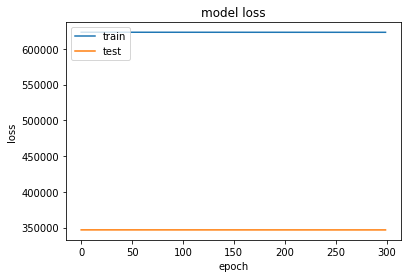

In [150]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Root mean squared error Train: 626441.965
Root mean squared error Test: 371765.698


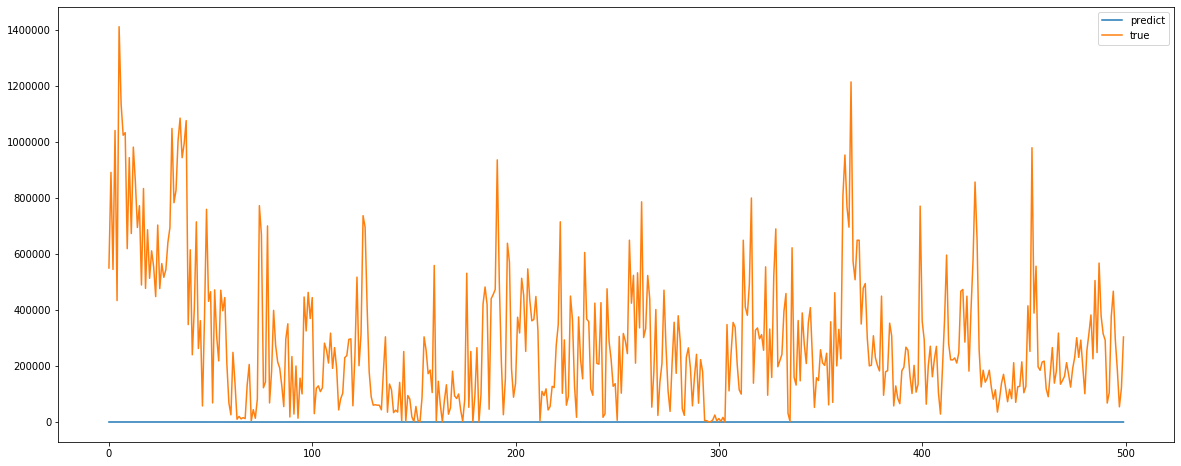

Variance : -1.453
Mean absolute error Train: 588383.698
Mean absolute error Test: 286135.010


In [151]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [152]:
#Simple RNN Unit

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 24)                2904      
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 25        
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


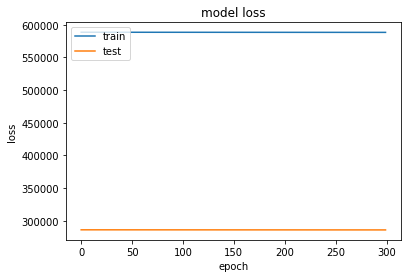

Root mean squared error Train: 626336.181
Root mean squared error Test: 371687.668


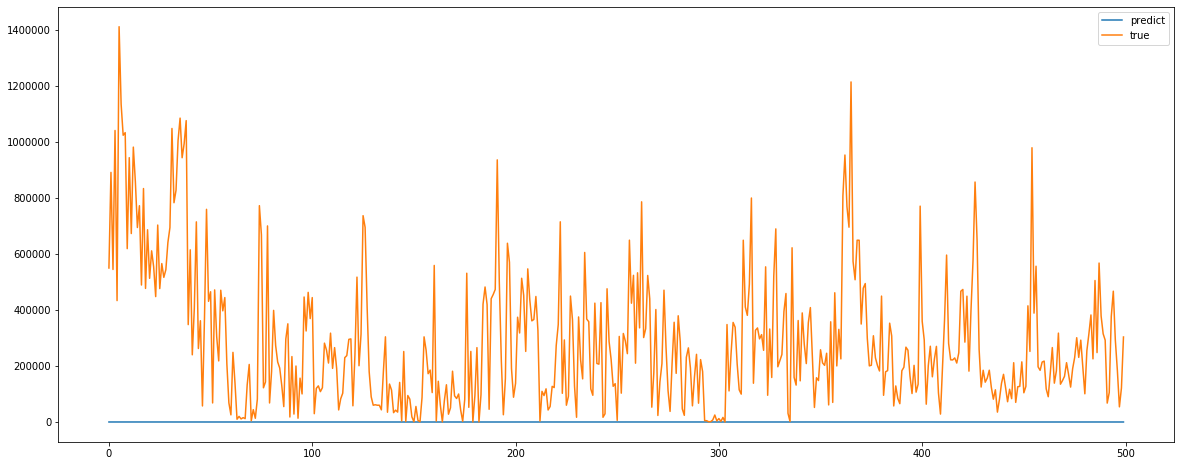

Variance : -1.452
Mean absolute error Train: 588271.252
Mean absolute error Test: 286039.431


In [153]:
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 24)                2904      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 25        
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


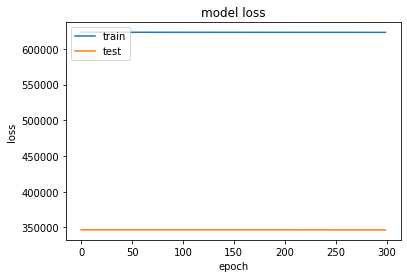

Root mean squared error Train: 626340.879
Root mean squared error Test: 371698.950


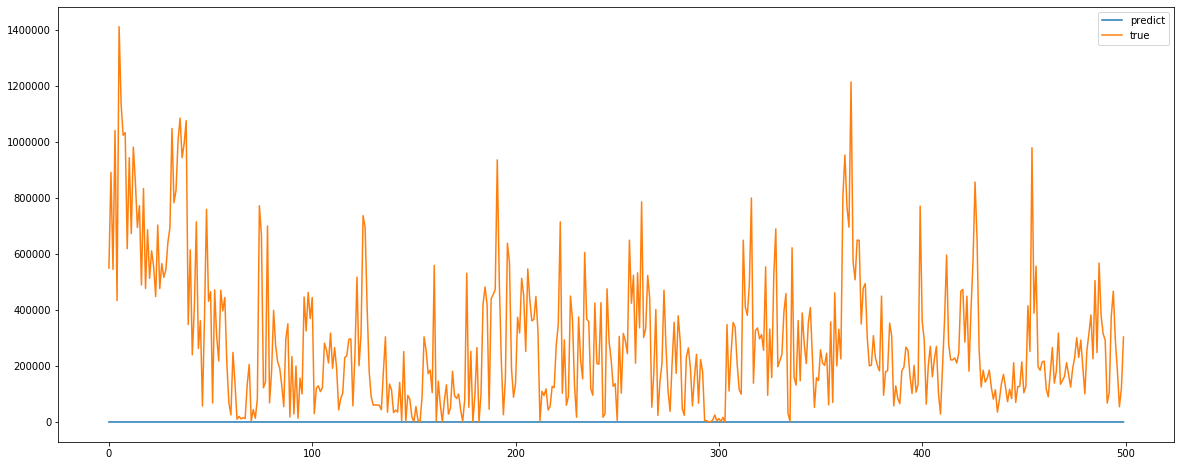

Variance : -1.452
Mean absolute error Train: 588276.623
Mean absolute error Test: 286056.356


In [154]:
 from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [155]:
#stacklstm

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 24)             11616     
_________________________________________________________________
lstm_13 (LSTM)               (None, 10)                1400      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 11        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


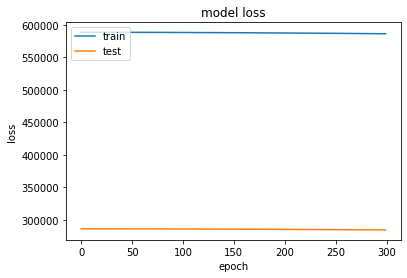

Root mean squared error Train: 624342.616
Root mean squared error Test: 370372.256


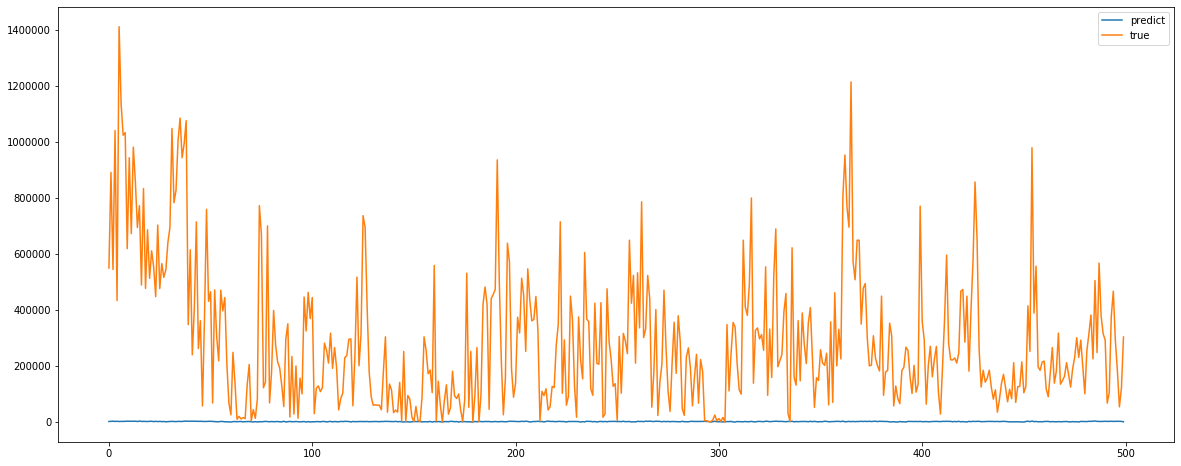

Variance : -1.435
Mean absolute error Train: 586161.368
Mean absolute error Test: 284499.389


In [156]:
model = Sequential()
model.add(LSTM(look_back,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(10, activation='relu'))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 48)                23232     
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 49        
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


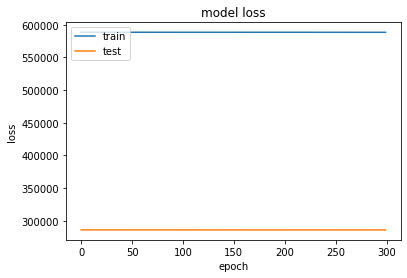

Root mean squared error Train: 626431.907
Root mean squared error Test: 371758.201


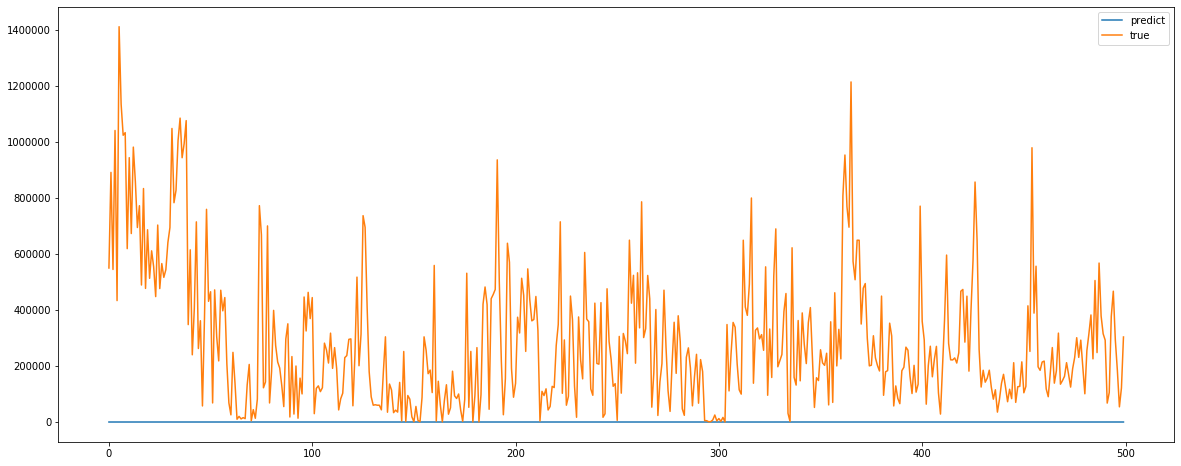

Variance : -1.453
Mean absolute error Train: 588372.184
Mean absolute error Test: 286124.388


In [157]:
model = Sequential()
model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [158]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 2,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),  input_shape=(None ,trainX.shape[2], trainX.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

ValueError: cannot reshape array of size 159264 into shape (1659,2,12,1)

In [ ]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 2,1,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,1,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 4,1,6,1))
testX = np.reshape(testX, (testX.shape[0], 4,1,6,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed

from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,1,120,1))
testX = np.reshape(testX, (testX.shape[0], 1,1,120,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,120))
testX = np.reshape(testX, (testX.shape[0], 1,120))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

#layer2=Dense(120,init='glorot_uniform')(layer)
#layer2.trainable=True

layer3=Dense(12,init='glorot_uniform')(layer)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,120))
testX = np.reshape(testX, (testX.shape[0], 1,120))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,120))
testX = np.reshape(testX, (testX.shape[0], 1,120))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(res0)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,120))
testX = np.reshape(testX, (testX.shape[0], 1,120))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=True

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True

#model.add(res)
flat=Flatten()(layer3)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
#RMSE

In [ ]:
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(look_back,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(10, activation='relu'))

model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))

model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 2,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),  input_shape=(None ,trainX.shape[2], trainX.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 2,1,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,1,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))